In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
import random
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.compose import make_column_transformer
from statsmodels.api import OLS
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from math import sqrt

On importe nos données.

In [174]:
# On pense à fixer le hasard grâce à seeds et des random states.
random.seed(42)


df = pd.read_csv('donnee_nettoye.csv')

In [175]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

On va manipuler notre modèle de machine learning.

In [176]:


X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)


model_linear_regression_ = LinearRegression()

model_linear_regression_.fit(X_train, y_train)

predictions_1 = model_linear_regression_.predict(X_test)

score = model_linear_regression_.score(X_test, y_test)

print(f"Le score du modèle sur l'ensemble de test est : {score:.2f}")

Le score du modèle sur l'ensemble de test est : 0.81


In [177]:
#On essaye d'utiliser les hyperparamètres avec GridSearch

pipe = make_pipeline(StandardScaler(), LinearRegression())

param_grid = {
    'linearregression__fit_intercept': [True, False],
}


X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)


grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best validation score = {grid_search.best_score_:.2f}")
print(f"Best hyperparameters = {grid_search.best_params_}")
print(f"Test performance = {grid_search.score(X_test, y_test):.2f}")


best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)


Best validation score = 0.73
Best hyperparameters = {'linearregression__fit_intercept': True}
Test performance = 0.81


On essaye d'améliorer avec des un modèle polynomiale

In [178]:

poly_features = PolynomialFeatures(degree=2)

model_linear_regression_1 = LinearRegression()

pipeline = Pipeline([("poly_features", poly_features), ("model", model_linear_regression_1)])


pipeline.fit(X_train, y_train)

predictions = pipeline.predict(X_test)

score = pipeline.score(X_test, y_test)

print(f"Le score du modèle sur l'ensemble de test est : {score:.2f}")

rmse = sqrt(mean_squared_error(y_test,predictions))

print("Le Root Mean Squared Error (RMSE) est de : {}".format(rmse))

MAE = mean_absolute_error(y_test, predictions)

print('Le score de MAE est :',MAE)

Le score du modèle sur l'ensemble de test est : 0.88
Le Root Mean Squared Error (RMSE) est de : 4653.78019212038
Le score de MAE est : 2964.923908820895


On essaye d'utiliser les hyperparamètre pour utiliser ce modèle de regression lineaire

In [179]:

scaler = StandardScaler()


poly_features = PolynomialFeatures(degree=2)

model_linear_regression_2 = LinearRegression()

pipeline = Pipeline([("scaler", scaler),("poly_features", poly_features), ("model", model_linear_regression_2)])

param_grid = {
    'model__fit_intercept': [True, False],
    'model__copy_X': [True, False],
    'scaler__with_mean': [True, False],
    'scaler__with_std': [True, False],
}

X = df.drop('charges', axis=1)

y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

scoring = ['r2', 'neg_mean_squared_error']
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, refit='r2', return_train_score=True)
grid_search.fit(X_train, y_train)


cv_results = cross_validate(pipeline, X_train, y_train, cv=5, scoring=scoring)

print(f"Best validation score = {grid_search.best_score_:.2f}")
print(f"Best hyperparameters = {grid_search.best_params_}")
print(f"Test performance = {grid_search.score(X_test, y_test):.2f}")

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)



Best validation score = 0.82
Best hyperparameters = {'model__copy_X': True, 'model__fit_intercept': False, 'scaler__with_mean': True, 'scaler__with_std': True}
Test performance = 0.88


On va rajouter  les hyperparamètre pour utiliser ce modèle de regression polynomiale

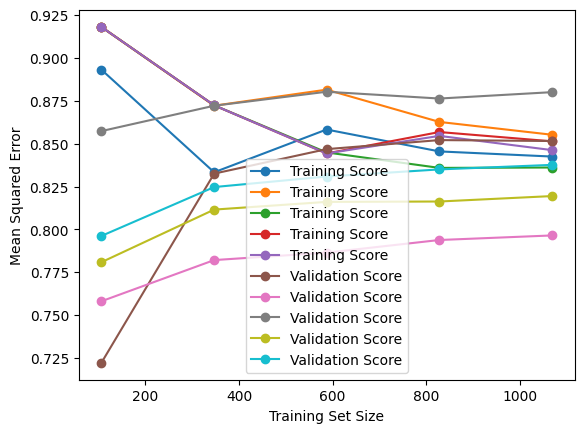

In [180]:

train_sizes, train_scores, val_scores = learning_curve(grid_search, X, y, cv=5)

plt.plot(train_sizes, train_scores, 'o-', label='Training Score')
plt.plot(train_sizes, val_scores, 'o-', label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.show()

In [181]:

scaler = StandardScaler()

poly_features = PolynomialFeatures(degree=2)

model_linear_regression_2 = LinearRegression()

pipeline = Pipeline([("scaler", scaler),("poly_features", poly_features), ("model", model_linear_regression_2)])

param_grid = {
    'model__fit_intercept': [True, False],
    'model__copy_X': [True, False],
    'scaler__with_mean': [True, False],
    'scaler__with_std': [True, False],
    'poly_features__degree':[1, 2, 3, 4], 
    'poly_features__interaction_only':[True, False], 
    'poly_features__include_bias':[True, False]
}

X = df.drop('charges', axis=1)

y = df['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)


scoring = ['r2', 'neg_mean_squared_error']
grid_search_parametre = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, refit='r2', return_train_score=True)
grid_search_parametre.fit(X_train, y_train)


cv_results = cross_validate(pipeline, X_train, y_train, cv=5, scoring=scoring)

print(f"Le meilleur score de validation est = {grid_search_parametre.best_score_:.2f}")
print(f"L'hyperparamètre le plus pertinent = {grid_search_parametre.best_params_}")
print(f"La performance de notre modèle est = {grid_search_parametre.score(X_test, y_test):.2f}")


best_model = grid_search_parametre.best_estimator_
predictions = best_model.predict(X_test)

Le meilleur score de validation est = 0.82
L'hyperparamètre le plus pertinent = {'model__copy_X': True, 'model__fit_intercept': False, 'poly_features__degree': 2, 'poly_features__include_bias': True, 'poly_features__interaction_only': False, 'scaler__with_mean': True, 'scaler__with_std': True}
La performance de notre modèle est = 0.88


In [182]:


X = df.drop('charges', axis=1)
y = df['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())

num_col = ["age", "bmi", "children"]
cat_col = ["sex", "smoker", "region"]
preprocessing = make_column_transformer((num_pipeline, num_col),
                (cat_pipeline, cat_col))
preprocessing = make_pipeline(preprocessing, PolynomialFeatures())

preprocessing.fit(X_train) 

X_cook= preprocessing.transform(X_train)
X_cook_columns= preprocessing.get_feature_names_out()
newdf= pd.DataFrame(X_cook).set_index(y_train.index)
newdf.columns = X_cook_columns

X_cook_test= preprocessing.transform(X_test) 
X_cook=sm.add_constant(X_cook)
model_lr= OLS(y_train , X_cook).fit()
influence = model_lr.get_influence().cooks_distance[0]
cooks_distance = influence

analyse=X_train.copy()
analyse['dcooks'] = influence
n= X_train.shape[0]
p = X_train.shape[1]
seuil_dcook = 4/n

residual_indice=analyse[analyse['dcooks']>seuil_dcook].index
residual_indice.size


X_train.drop(residual_indice, inplace=True, axis=0)
y_train.drop(residual_indice, inplace=True, axis=0)

X_train_new =X_train
Y_train_new =y_train


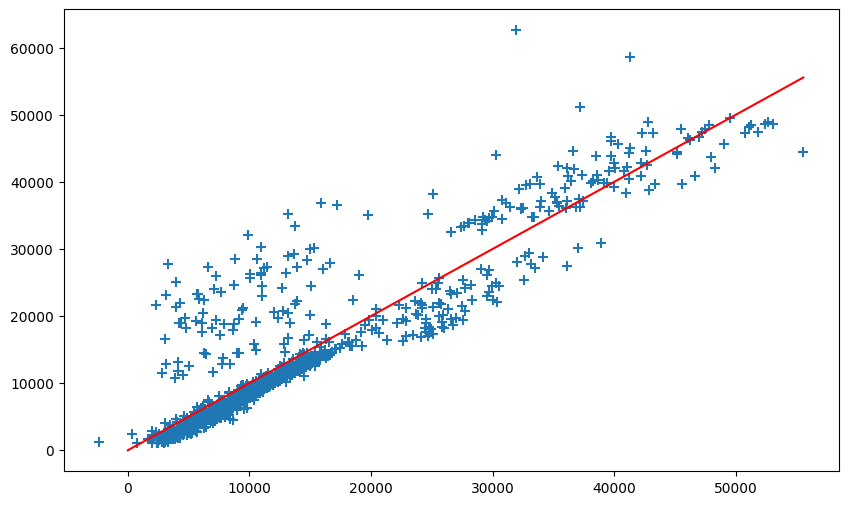

In [183]:

scaler = StandardScaler()


poly_features = PolynomialFeatures(degree=2)

model_linear_regression_2 = LinearRegression()

pipeline = Pipeline([("scaler", scaler),("poly_features", poly_features), ("model", model_linear_regression_2)])

param_grid = {
    'model__fit_intercept': [True, False],
    'model__copy_X': [True, False],
    'scaler__with_mean': [True, False],
    'scaler__with_std': [True, False],
}

X = df.drop('charges', axis=1)

y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

scoring = ['r2', 'neg_mean_squared_error']
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, refit='r2', return_train_score=True)
grid_search.fit(X_train, y_train)



best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_train)

plt.subplots(figsize=(10, 6))
plt.scatter(y_pred, y_train, marker="+", s=50)
plt.plot(np.arange(max(y_pred)), np.arange(max(y_pred)), '-', color='r')
plt.show()

In [184]:

scaler = StandardScaler()

poly_features = PolynomialFeatures(degree=2)

model_linear_regression_2 = LinearRegression()

pipeline = Pipeline([("scaler", scaler),("poly_features", poly_features), ("model", model_linear_regression_2)])

param_grid = {
    'model__fit_intercept': [True, False],
    'model__copy_X': [True, False],
    'scaler__with_mean': [True, False],
    'scaler__with_std': [True, False],
    'poly_features__degree':[1, 2, 3, 4], 
    'poly_features__interaction_only':[True, False], 
    'poly_features__include_bias':[True, False]
}

X = X_train_new

y = Y_train_new

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

scoring = ['r2', 'neg_mean_squared_error']
grid_search_cook = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, refit='r2', return_train_score=True)
grid_search_cook.fit(X_train, y_train)


cv_results = cross_validate(pipeline, X_train, y_train, cv=5, scoring=scoring)


print(f"Best validation score = {grid_search_cook.best_score_:.2f}")
print(f"Best hyperparameters = {grid_search_cook.best_params_}")
print(f"Test performance = {grid_search_cook.score(X_test, y_test):.2f}")


best_model = grid_search_cook.best_estimator_
predictions = best_model.predict(X_test)
print(cv_results)

Best validation score = 0.90
Best hyperparameters = {'model__copy_X': True, 'model__fit_intercept': True, 'poly_features__degree': 2, 'poly_features__include_bias': True, 'poly_features__interaction_only': False, 'scaler__with_mean': True, 'scaler__with_std': True}
Test performance = 0.86
{'fit_time': array([0.01076126, 0.01034379, 0.01049972, 0.00891614, 0.00894046]), 'score_time': array([0.00392342, 0.00380611, 0.0036397 , 0.00534582, 0.00511384]), 'test_r2': array([0.91796226, 0.89723563, 0.91622641, 0.8765996 , 0.86716422]), 'test_neg_mean_squared_error': array([ -9314741.2162302 , -15165150.48019449, -11311734.83879026,
       -15831678.82289397, -17198525.70020499])}


In [185]:

# Un BMI inférieur à 18,5 est considéré comme une maigreur sous-pondérée.
# Un BMI entre 18,5 et 24,9 est considéré comme un poids santé.
# Un BMI entre 25 et 29,9 est considéré comme une surcharge pondérale.
# Un BMI supérieur à 30 est considéré comme une obésité.
#Il peut être intéressant de modifier notre jeu de donné pour améliorer notre modèle
data = pd.read_csv('donnee_nettoye.csv')
data.loc[data['bmi'] < 18.5, 'bmi'] = 0
data.loc[(data['bmi'] >= 30), 'bmi'] = 3
data.loc[(data['bmi'] >= 25) & (data['bmi'] < 30), 'bmi'] = 2
data.loc[(data['bmi'] >= 18.5) & (data['bmi'] < 25), 'bmi'] = 1



In [186]:
data["bmi"].value_counts()

3.0    706
2.0    386
1.0    225
0.0     20
Name: bmi, dtype: int64

Le meilleur score de validation avec les nouvelle données = 0.73
Les meilleurs hyperparamètres = {'linearregression__fit_intercept': True}
Le score de performance = 0.80


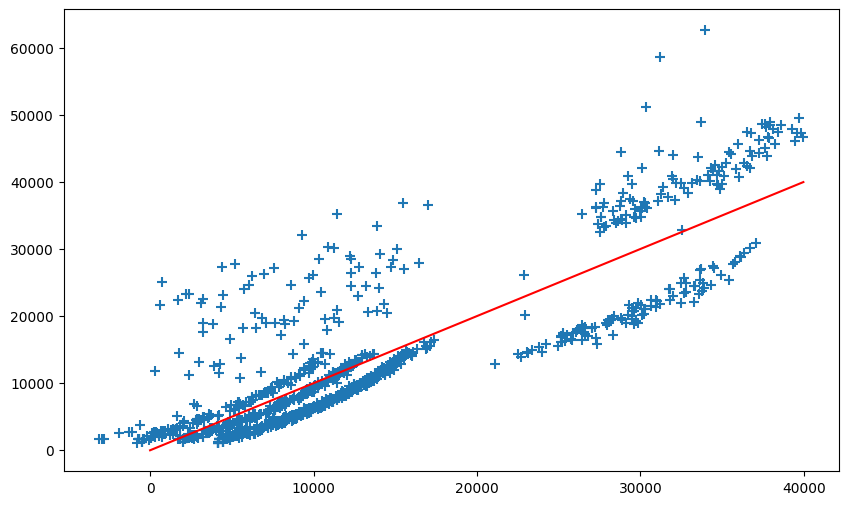

In [187]:
#On essaye d'utiliser les hyperparamètres avec GridSearch sur le nouveaux set

pipe = make_pipeline(StandardScaler(), LinearRegression())

param_grid = {
    'linearregression__fit_intercept': [True, False],
}

X = data.drop('charges', axis=1)
y = data['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)


grid_search_data = GridSearchCV(pipe, param_grid, cv=5)
grid_search_data.fit(X_train, y_train)

# evaluate the model on the test set
print(f"Le meilleur score de validation avec les nouvelle données = {grid_search_data.best_score_:.2f}")
print(f"Les meilleurs hyperparamètres = {grid_search_data.best_params_}")
print(f"Le score de performance = {grid_search_data.score(X_test, y_test):.2f}")

# use the best model to make predictions
best_model = grid_search_data.best_estimator_
predictions = best_model.predict(X_train)
plt.subplots(figsize=(10, 6))
plt.scatter(predictions, y_train, marker="+", s=50)
plt.plot(np.arange(max(predictions)), np.arange(max(predictions)), '-', color='r')
plt.show()

In [188]:
#On essaye de rajouter des hyperparmètres
pipe = make_pipeline(StandardScaler(), LinearRegression())

param_grid = {
    'linearregression__fit_intercept': [True, False],
    'linearregression__copy_X': [True, False],
    'linearregression__n_jobs': [-1, 1],
    'linearregression__positive': [True, False]
}


X = data.drop('charges', axis=1)
y = data['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

random_search = RandomizedSearchCV(pipe, param_grid, cv=5, n_iter=10)
random_search.fit(X_train, y_train)

print(f"Best validation score = {random_search.best_score_:.2f}")
print(f"Best hyperparameters = {random_search.best_params_}")
print(f"Test performance = {random_search.score(X_test, y_test):.2f}")

best_model = random_search.best_estimator_
predictions = best_model.predict(X_test) 

Best validation score = 0.73
Best hyperparameters = {'linearregression__positive': False, 'linearregression__n_jobs': -1, 'linearregression__fit_intercept': True, 'linearregression__copy_X': False}
Test performance = 0.80


On calcule la distance de cook pour mieux séparer nos données

In [189]:


X = data.drop('charges', axis=1)

y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())

num_col = ["age", "bmi", "children"]
cat_col = ["sex", "smoker", "region"]

preprocessing = make_column_transformer((num_pipeline, num_col),
                (cat_pipeline, cat_col))
preprocessing = make_pipeline(preprocessing, PolynomialFeatures())

preprocessing.fit(X_train) 

X_cook= preprocessing.transform(X_train)
X_cook_columns= preprocessing.get_feature_names_out()
newdf= pd.DataFrame(X_cook).set_index(y_train.index)
newdf.columns = X_cook_columns

X_cook_test= preprocessing.transform(X_test) 

X_cook=sm.add_constant(X_cook)
model_lr= OLS(y_train , X_cook).fit()
influence = model_lr.get_influence().cooks_distance[0]
cooks_distance = influence

analyse=X_train.copy()
analyse['dcooks'] = influence
n= X_train.shape[0]
p = X_train.shape[1]
seuil_dcook = 4/n

residual_indice=analyse[analyse['dcooks']>seuil_dcook].index
residual_indice.size

X_train.drop(residual_indice, inplace=True, axis=0)
y_train.drop(residual_indice, inplace=True, axis=0)

X_train_new = X_train
Y_train_new = Y_train_new

Le meilleur score de validation avec les nouvelle données = -0.01
Les meilleurs hyperparamètres = {'linearregression__fit_intercept': True}
Le score de performance = 0.02


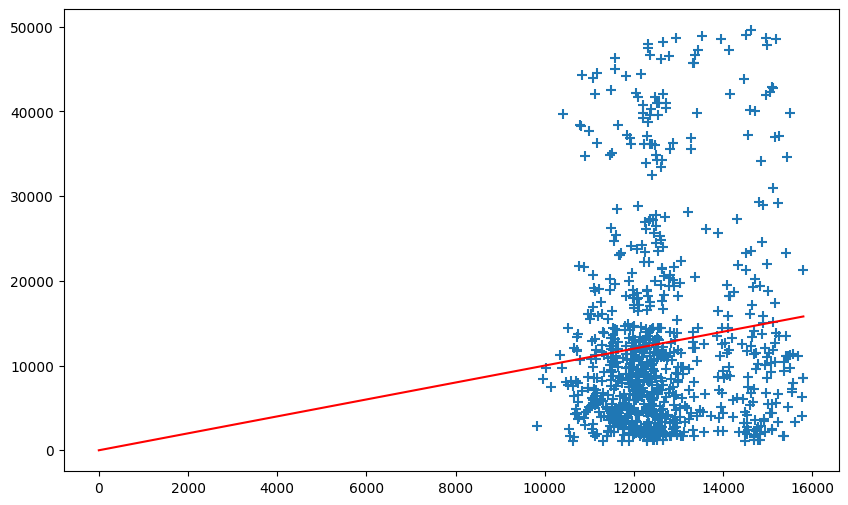

In [190]:
#On essaye d'utiliser les hyperparamètres avec GridSearch sur le set separer de cook

pipe = make_pipeline(StandardScaler(), LinearRegression())

param_grid = {
    'linearregression__fit_intercept': [True, False],
}

X = X_train_new
y = Y_train_new


X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)


grid_search_data = GridSearchCV(pipe, param_grid, cv=5)
grid_search_data.fit(X_train, y_train)


print(f"Le meilleur score de validation avec les nouvelle données = {grid_search_data.best_score_:.2f}")
print(f"Les meilleurs hyperparamètres = {grid_search_data.best_params_}")
print(f"Le score de performance = {grid_search_data.score(X_test, y_test):.2f}")


best_model = grid_search_data.best_estimator_
predictions = best_model.predict(X_train)
plt.subplots(figsize=(10, 6))
plt.scatter(predictions, y_train, marker="+", s=50)
plt.plot(np.arange(max(predictions)), np.arange(max(predictions)), '-', color='r')
plt.show()

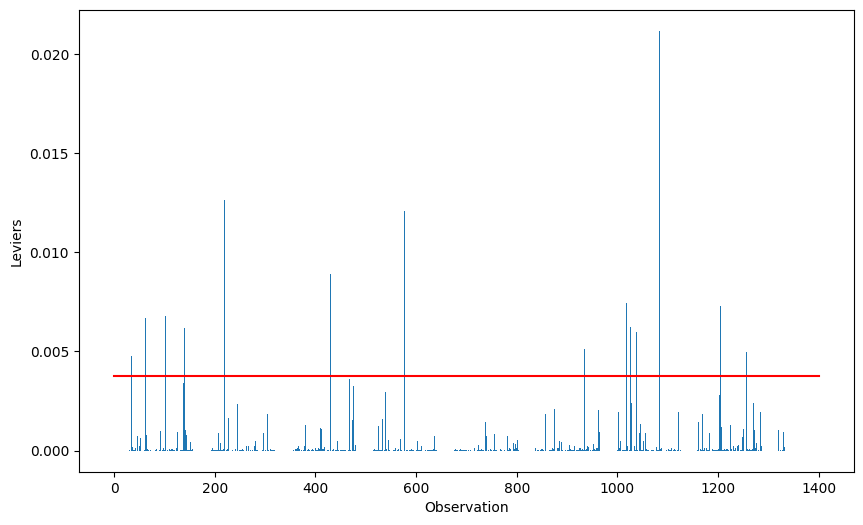

In [191]:
plt.figure(figsize=(10,6))
plt.bar(analyse.index, analyse['dcooks'])
# plt.xticks(np.arange(0, 200, step=1))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1400], [seuil_dcook, seuil_dcook], color='r')
plt.show()
#On représente notre distance de cook

Modele ElasticNet (Permet de choisir entre les deux systeme)

In [192]:
X = df.drop('charges', axis=1)

y = df['charges']

model_elastic_net = ElasticNet()

model_elastic_net.fit(X_train, y_train)

score = model_elastic_net.score(X_test, y_test)

print(f"Le score du modèle sur l'ensemble de test est : {score:.2f}")


Le score du modèle sur l'ensemble de test est : 0.00


In [193]:

X = df.drop('charges', axis=1)

y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

enet = ElasticNet()

param_grid = {'alpha': [10], 'l1_ratio': [1]}


grid_search = GridSearchCV(enet, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Meilleurs hyperparamètres: ", grid_search.best_params_)

Meilleurs hyperparamètres:  {'alpha': 10, 'l1_ratio': 1}


On en déduit que le meilleur modèle serait le Lasso.On teste le modèle ElasticNEt

In [194]:

pipe = make_pipeline(StandardScaler(), ElasticNet())


param_grid = {
    'elasticnet__alpha': [0.01, 0.1, 1.0, 10.0],
    'elasticnet__l1_ratio': [0.1, 0.5, 0.7, 0.9]
}

X = df.drop('charges', axis=1)

y = df['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Meilleur score de validation = {grid_search.best_score_:.2f}")
print(f"Meilleurs hyperparametre = {grid_search.best_params_}")
print(f"Score de performance = {grid_search.score(X_test, y_test):.2f}")

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

Meilleur score de validation = 0.73
Meilleurs hyperparametre = {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.9}
Score de performance = 0.80


Modele Lasso

On teste le modèle Lasso

In [195]:

X = df.drop('charges', axis=1)

y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

model_lasso = Lasso(alpha=1.0)

model_lasso.fit(X_train, y_train)

score = model_lasso.score(X_test, y_test)

print(f"Le score du modèle sur l'ensemble de test est : {score:.2f}")




Le score du modèle sur l'ensemble de test est : 0.81


On teste en modifiant les hyperparamètres.

In [196]:

pipe = make_pipeline(StandardScaler(), Lasso())


param_grid = {
    'lasso__alpha': [0.01, 0.1, 1.0, 10.0],
}

X = df.drop('charges', axis=1)

y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best validation score = {grid_search.best_score_:.2f}")
print(f"Best hyperparameters = {grid_search.best_params_}")
print(f"Test performance = {grid_search.score(X_test, y_test):.2f}")

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

Best validation score = 0.73
Best hyperparameters = {'lasso__alpha': 10.0}
Test performance = 0.81


On étudie les résidus

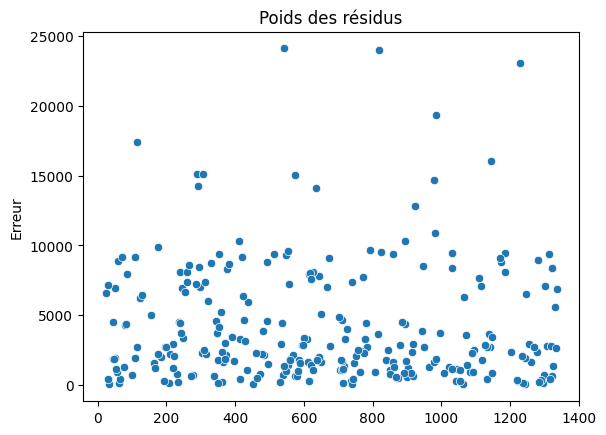

0.725770083144266

In [197]:

X = df.drop(columns='charges')
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())


num_col = ["age", "bmi", "children"]
cat_col = ["sex", "smoker", "region"]

preprocessing_lasso = make_column_transformer((num_pipeline, num_col),
                (cat_pipeline, cat_col))
preprocessing_lasso = make_pipeline(preprocessing_lasso, Lasso())
preprocessing_lasso.fit(X_train,y_train) 


y_pred = preprocessing_lasso.predict(X_test)

residual = (y_test - y_pred).abs()

sns.scatterplot(residual)
plt.title('Poids des résidus')
plt.ylabel('Erreur')
plt.show()

scores = cross_val_score(preprocessing_lasso, X_train, y_train, cv=5).mean()
scores





On sépare via la distance de cook les résidus

In [198]:

X = df.drop(columns='charges')
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)


num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())


num_col = ["age", "bmi", "children"]
cat_col = ["sex", "smoker", "region"]


preprocessing_lasso = make_column_transformer((num_pipeline, num_col),
                (cat_pipeline, cat_col))
preprocessing_lasso = make_pipeline(preprocessing_lasso, Lasso())
preprocessing_lasso.fit(X_train,y_train) 


X_cook= preprocessing.transform(X_train)
X_cook_columns= preprocessing.get_feature_names_out()
newdf= pd.DataFrame(X_cook).set_index(y_train.index)
newdf.columns = X_cook_columns

X_cook_test= preprocessing.transform(X_test) 
X_cook=sm.add_constant(X_cook)
model_lasso_cook= OLS(y_train , X_cook).fit()
influence = model_lasso_cook.get_influence().cooks_distance[0]
cooks_distance = influence

analyse=X_train.copy()
analyse['dcooks'] = influence
n= X_train.shape[0]
p = X_train.shape[1]
seuil_dcook = 4/n

residual_indice=analyse[analyse['dcooks']>seuil_dcook].index
residual_indice.size


X_train.drop(residual_indice, inplace=True, axis=0)
y_train.drop(residual_indice, inplace=True, axis=0)

X_train_new =X_train
Y_train_new =y_train


On teste sur notre nouveau jeu de donnée "de cook"

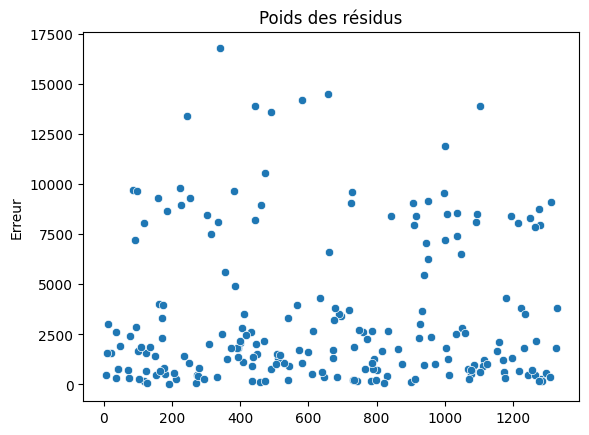

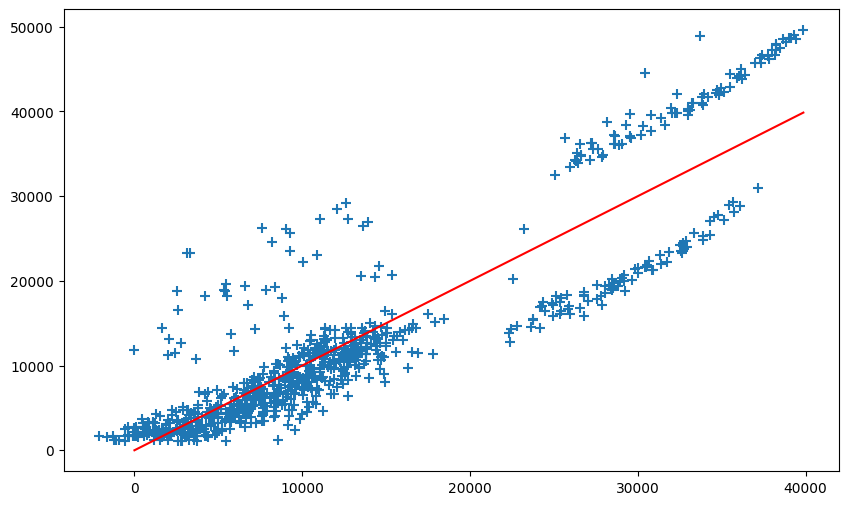

In [199]:

X = X_train_new
y = Y_train_new


X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())


num_col = ["age", "bmi", "children"]
cat_col = ["sex", "smoker", "region"]


preprocessing_lasso = make_column_transformer((num_pipeline, num_col),
                (cat_pipeline, cat_col))
preprocessing_lasso = make_pipeline(preprocessing_lasso, Lasso())
preprocessing_lasso.fit(X_train,y_train)


y_pred = preprocessing_lasso.predict(X_test)

residual = (y_test - y_pred).abs()

sns.scatterplot(residual)
plt.title('Poids des résidus')
plt.ylabel('Erreur')
plt.show()

predictions = preprocessing_lasso.predict(X_train)
plt.subplots(figsize=(10, 6))
plt.scatter(predictions, y_train, marker="+", s=50)
plt.plot(np.arange(max(predictions)), np.arange(max(predictions)), '-', color='r')
plt.show()


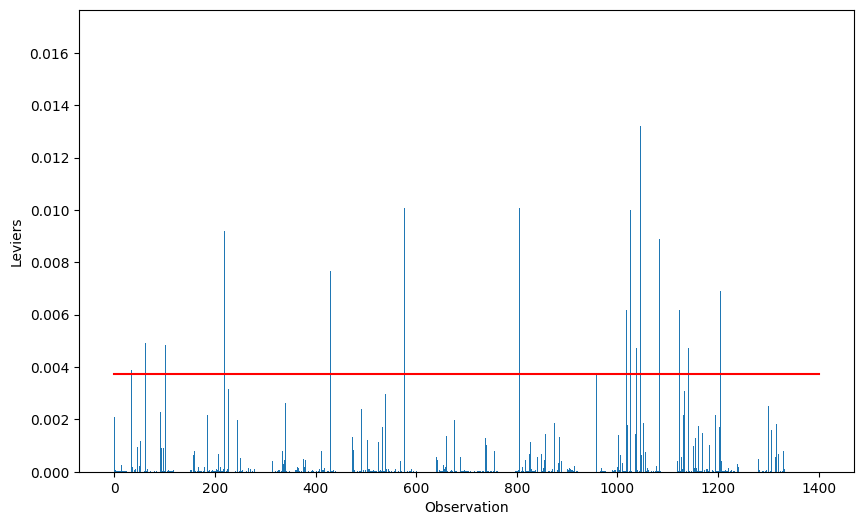

In [200]:
plt.figure(figsize=(10,6))
plt.bar(analyse.index, analyse['dcooks'])
# plt.xticks(np.arange(0, 200, step=1))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1400], [seuil_dcook, seuil_dcook], color='r')
plt.show()

On regarde vite fait le modèle de ridge , mais on ne va pas calculer dessus , vu les résultats de notre test

Modele Ridge 

In [201]:

X = df.drop(columns='charges')
y = df['charges']

model_ridge = Ridge()

model_ridge.fit(X_train, y_train)

score = model_ridge.score(X_test, y_test)

print(f"Le score du modèle sur l'ensemble de test est : {score:.2f}")

Le score du modèle sur l'ensemble de test est : 0.77


In [202]:

pipe = make_pipeline(StandardScaler(), Ridge())

param_grid = {
    'ridge__alpha': [0.01, 0.1, 1.0, 10.0],
    'ridge__max_iter': [100, 1000, 10000],
}

X = df.drop('charges', axis=1)

y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)


print(f"Best validation score = {grid_search.best_score_:.2f}")
print(f"Best hyperparameters = {grid_search.best_params_}")
print(f"Test performance = {grid_search.score(X_test, y_test):.2f}")

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

Best validation score = 0.73
Best hyperparameters = {'ridge__alpha': 10.0, 'ridge__max_iter': 100}
Test performance = 0.80


In [203]:

X = df.drop(columns='charges')
y = df['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())


num_col = ["age", "bmi", "children"]
cat_col = ["sex", "smoker", "region"]


preprocessing = make_column_transformer((num_pipeline, num_col),
                (cat_pipeline, cat_col))
preprocessing = make_pipeline(preprocessing, Ridge())
preprocessing.fit(X_train,y_train) 





Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('ridge', Ridge())])

In [204]:


scores = cross_val_score(model_ridge, X_train, y_train, cv=5).mean()
scores


0.7259057620508831

On va utiliser ce modèle pour notre application streamlit.

In [205]:
#On utilise le modèle avec le meilleur score 


X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, train_size=0.8)

poly_features_final = PolynomialFeatures(degree=2)

model_linear_regression_1_final = LinearRegression()

modele_final = Pipeline([("poly_features_final", poly_features_final), ("model", model_linear_regression_1_final)])


modele_final.fit(X_train, y_train)

predictions = modele_final.predict(X_test)

In [206]:
import pickle

# Enregistrez le modèle dans un fichier pickle
with open('model.pkl', 'wb') as file:
  pickle.dump(modele_final, file)